In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Paramerter Set


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
test_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/test.tsv", delimiter="\t")
train_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/train.tsv", delimiter="\t")

# test_df = pd.read_csv("/content/drive/MyDrive/backups/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/test.tsv", delimiter="\t")
# train_df = pd.read_csv("/content/drive/MyDrive/backups/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/train.tsv", delimiter="\t")

In [22]:
import datetime

def day_of_year(date_str):
    date = datetime.datetime.strptime(date_str, "%Y-%m-%d")
    first_day = datetime.datetime(date.year, 1, 1)
    delta = date - first_day
    return delta.days + 1
day_of_year_vec = np.vectorize(day_of_year)

In [23]:
print(train_df.columns)

Index(['id', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [24]:
id = train_df["id"].to_numpy()
dteday = train_df["dteday"].to_numpy()
season = train_df["season"].to_numpy()
yr = train_df["yr"].to_numpy()
mnth = train_df["mnth"].to_numpy()
hr = train_df["hr"].to_numpy()
holiday = train_df["holiday"].to_numpy()
weekday = train_df["weekday"].to_numpy()
workingday = train_df["workingday"].to_numpy()
weathersit = train_df["weathersit"].to_numpy()
temp = train_df["temp"].to_numpy()
atemp = train_df["atemp"].to_numpy()
hum = train_df["hum"].to_numpy()
windspeed = train_df["windspeed"].to_numpy()
# cnt = train_df["cnt"].to_numpy()
cnt = train_df["cnt"].to_numpy().reshape(-1, 1)

# RNN try5

In [ ]:
maxlen = 12
train_prms = np.empty((id.shape[0], maxlen))
print(train_prms.shape)
train_prms[:, 0] = season
train_prms[:, 1] = yr
train_prms[:, 2] = mnth
train_prms[:, 3] = hr
train_prms[:, 4] = holiday
train_prms[:, 5] = weekday
train_prms[:, 6] = workingday
train_prms[:, 7] = weathersit
train_prms[:, 8] = atemp
train_prms[:, 9] = temp
train_prms[:, 10] = hum
train_prms[:, 11] = windspeed

train_trgs = cnt

(8645, 12)


In [ ]:
print(f"train_parameter = \n{train_prms}:{train_prms.shape}")
print(f"train_target = {train_trgs}:{train_trgs.shape}")
# print(f"test_parameter = \n{test_prm}:{test_prm.shape}")

train_parameter = 
[[ 1.      0.      1.     ...  0.24    0.81    0.    ]
 [ 1.      0.      1.     ...  0.22    0.8     0.    ]
 [ 1.      0.      1.     ...  0.22    0.8     0.    ]
 ...
 [ 1.      0.     12.     ...  0.4     0.58    0.194 ]
 [ 1.      0.     12.     ...  0.38    0.62    0.1343]
 [ 1.      0.     12.     ...  0.36    0.66    0.    ]]:(8645, 12)
train_target = [[16]
 [40]
 [32]
 ...
 [52]
 [38]
 [31]]:(8645, 1)


In [ ]:
y = train_prms.reshape(train_prms.shape[0], train_prms.shape[1], 1)
# train_prm2 = np.delete(train_prm, 0, 1)
# y = train_prm2.reshape(train_prm2.shape[0], train_prm2.shape[1], 1)
x = train_trgs.reshape(train_trgs.shape[0], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 600  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
x.shape

(8645, 1)

In [ ]:
ES = EarlyStopping(mode='auto', patience=20)
model.fit(y, x,
          epochs=300, #100 epochで学習
          validation_split=0.1, #学習データの10%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/300
244/244 [==============================] - 4s 8ms/step - loss: 23413.5957 - accuracy: 0.0127 - val_loss: 11978.7383 - val_accuracy: 0.0104
Epoch 2/300
244/244 [==============================] - 1s 6ms/step - loss: 18597.8516 - accuracy: 0.0129 - val_loss: 12583.9238 - val_accuracy: 0.0104
Epoch 3/300
244/244 [==============================] - 2s 6ms/step - loss: 18210.5156 - accuracy: 0.0129 - val_loss: 11280.2939 - val_accuracy: 0.0104
Epoch 4/300
244/244 [==============================] - 2s 7ms/step - loss: 12580.5645 - accuracy: 0.0129 - val_loss: 9205.0879 - val_accuracy: 0.0104
Epoch 5/300
244/244 [==============================] - 2s 7ms/step - loss: 10658.7832 - accuracy: 0.0129 - val_loss: 9736.6729 - val_accuracy: 0.0104
Epoch 6/300
244/244 [==============================] - 1s 5ms/step - loss: 9109.5410 - accuracy: 0.0129 - val_loss: 7069.2871 - val_accuracy: 0.0104
Epoch 7/300
244/244 [==============================] - 1s 5ms/step - loss: 8763.8789 - accuracy: 0

In [ ]:
predicted = model.predict(y)
model.evaluate(y,x)

271/271 [==============================] - 1s 3ms/step - loss: 1092.7804 - accuracy: 0.0126


[1092.7803955078125, 0.012608444318175316]

In [ ]:
r2 = 1 -  np.sum((predicted - x)**2) / np.sum((x - np.mean(x))**2)
print(r2)

0.938950118580795


In [ ]:
predicted

array([[27.409393],
       [29.17705 ],
       [22.01295 ],
       ...,
       [55.430782],
       [53.570374],
       [49.89265 ]], dtype=float32)

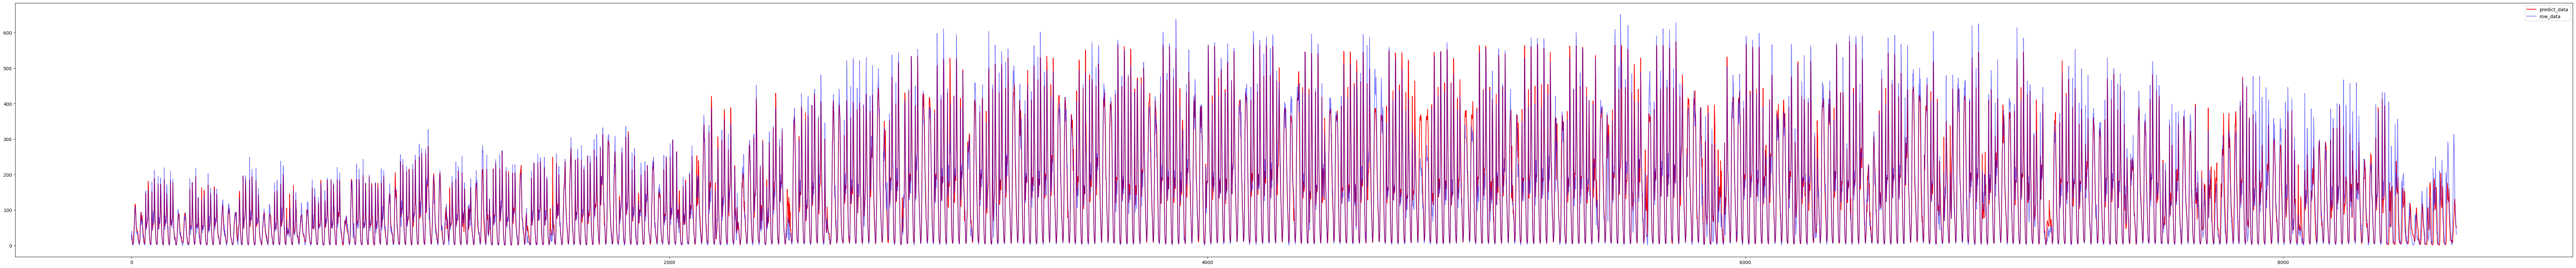

In [ ]:
plt.figure(figsize=(100, 10))
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
# plt.savefig("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/RNN2_try5.png")
plt.show()

In [ ]:
x

array([[16],
       [40],
       [32],
       ...,
       [52],
       [38],
       [31]])

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

25.484865188598633
0.00610956774567658
1.1766650883945144


0
count  8645.000000
mean      1.176665
std       0.896374
min       0.006110
25%       0.887099
50%       1.001395
75%       1.175035
max      25.484865

In [ ]:
y2 = test_prm.reshape(test_prm.shape[0], test_prm.shape[1], 1)

predicted2 = model.predict(y)
display(predicted2)

NameError: ignored

# RNN try6

In [ ]:
maxlen = 12
train_prms = np.empty((id.shape[0], maxlen))
print(train_prms.shape)
train_prms[:, 0] = (season-1) / 2.0   #季節を0～1に正規化
train_prms[:, 1] = yr
train_prms[:, 2] = (mnth-1) / 6.0 #月を0～1に正規化
train_prms[:, 3] = hr / (23.0/4) #時間を0～1に正規化
train_prms[:, 4] = holiday
train_prms[:, 5] = weekday / 3.0   #曜日を0～1に正規化
train_prms[:, 6] = workingday
train_prms[:, 7] = (weathersit-1) / 1.0   #天気を0～1に正規化
train_prms[:, 8] = atemp
train_prms[:, 9] = temp
train_prms[:, 10] = hum
train_prms[:, 11] = windspeed
print(train_prms)
# rnd = np.random.default_rng()
# rnd.shuffle(train_prms,axis=0)
# print(train_prms)

train_trgs = cnt

(8645, 12)
[[0.         0.         0.         ... 0.24       0.81       0.        ]
 [0.         0.         0.         ... 0.22       0.8        0.        ]
 [0.         0.         0.         ... 0.22       0.8        0.        ]
 ...
 [0.         0.         1.83333333 ... 0.4        0.58       0.194     ]
 [0.         0.         1.83333333 ... 0.38       0.62       0.1343    ]
 [0.         0.         1.83333333 ... 0.36       0.66       0.        ]]


In [ ]:
print(f"train_parameter = \n{train_prms}:{train_prms.shape}")
print(f"train_target =\n {train_trgs}:{train_trgs.shape}")
# print(f"test_parameter = \n{test_prm}:{test_prm.shape}")

train_parameter = 
[[0.         0.         0.         ... 0.24       0.81       0.        ]
 [0.         0.         0.         ... 0.22       0.8        0.        ]
 [0.         0.         0.         ... 0.22       0.8        0.        ]
 ...
 [0.         0.         1.83333333 ... 0.4        0.58       0.194     ]
 [0.         0.         1.83333333 ... 0.38       0.62       0.1343    ]
 [0.         0.         1.83333333 ... 0.36       0.66       0.        ]]:(8645, 12)
train_target =
 [[16]
 [40]
 [32]
 ...
 [52]
 [38]
 [31]]:(8645, 1)


In [ ]:
y = train_prms.reshape(train_prms.shape[0], train_prms.shape[1], 1)
x = train_trgs.reshape(train_trgs.shape[0], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 800  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
x.shape

(8645, 1)

In [ ]:
ES = EarlyStopping(mode='auto', patience=20)
model.fit(y, x,
          epochs=200, #100 epochで学習
          validation_split=0.2, #学習データの10%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/200
217/217 [==============================] - 5s 12ms/step - loss: 22893.7148 - accuracy: 0.0137 - val_loss: 14263.8252 - val_accuracy: 0.0069
Epoch 2/200
217/217 [==============================] - 2s 9ms/step - loss: 18830.9746 - accuracy: 0.0140 - val_loss: 14377.1787 - val_accuracy: 0.0069
Epoch 3/200
217/217 [==============================] - 2s 9ms/step - loss: 18782.1855 - accuracy: 0.0140 - val_loss: 14494.7422 - val_accuracy: 0.0069
Epoch 4/200
217/217 [==============================] - 2s 8ms/step - loss: 18785.4844 - accuracy: 0.0140 - val_loss: 14529.4814 - val_accuracy: 0.0069
Epoch 5/200
217/217 [==============================] - 2s 7ms/step - loss: 18784.3145 - accuracy: 0.0140 - val_loss: 14387.8701 - val_accuracy: 0.0069
Epoch 6/200
217/217 [==============================] - 2s 7ms/step - loss: 18782.1602 - accuracy: 0.0140 - val_loss: 14493.9512 - val_accuracy: 0.0069
Epoch 7/200
217/217 [==============================] - 2s 7ms/step - loss: 18779.6797 - accur

In [ ]:
predicted = model.predict(y)
model.evaluate(y,x)

271/271 [==============================] - 1s 4ms/step - loss: 2694.3430 - accuracy: 0.0078


[2694.343017578125, 0.0077501446940004826]

In [ ]:
r2 = 1 -  np.sum((predicted - x)**2) / np.sum((x - np.mean(x))**2)
print(r2)

0.8494763449672277


In [ ]:
predicted

array([[ 27.311451],
       [ 22.355331],
       [ 14.071514],
       ...,
       [225.4     ],
       [201.45825 ],
       [161.31784 ]], dtype=float32)

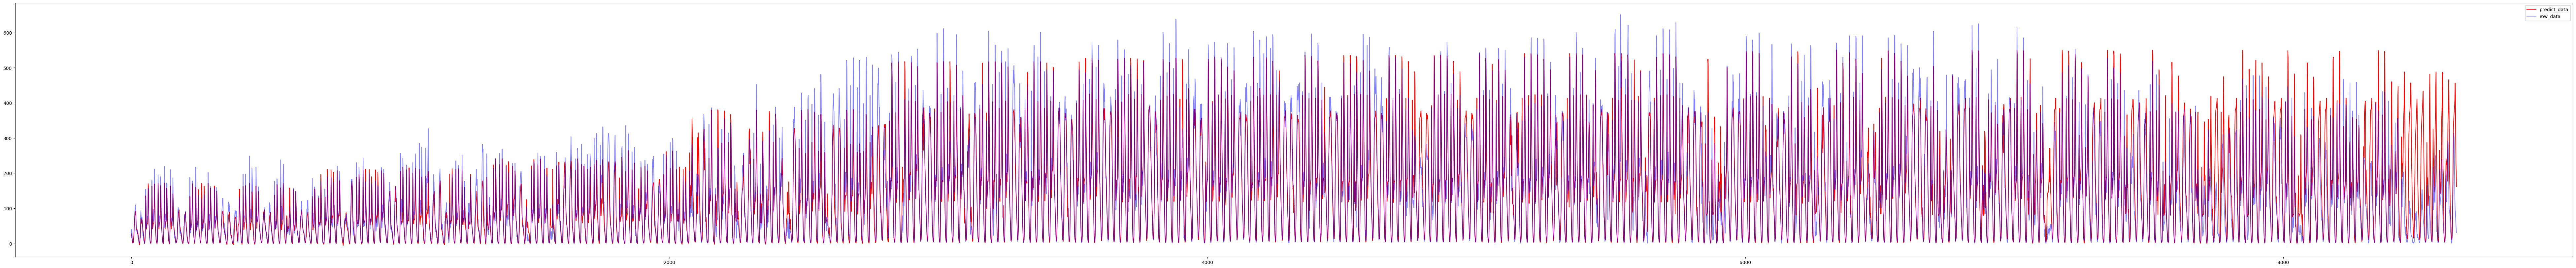

In [ ]:
plt.figure(figsize=(100, 10))
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
# plt.savefig("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/RNN2_try6.png")
plt.show()

In [ ]:
x

array([[16],
       [40],
       [32],
       ...,
       [52],
       [38],
       [31]])

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

34.16468811035156
-4.361661434173584
1.2037493632443292


0
count  8645.000000
mean      1.203749
std       1.147652
min      -4.361661
25%       0.838538
50%       0.989879
75%       1.234167
max      34.164688

In [ ]:
# y2 = test_prm.reshape(test_prm.shape[0], test_prm.shape[1], 1)

# predicted2 = model.predict(y)
# display(predicted2)

# RNN try7

In [ ]:
maxlen = 13
train_prms = np.empty((id.shape[0], maxlen))
print(train_prms.shape)
train_prms[:, 0] = day_of_year_vec(dteday) /365
train_prms[:, 1] = (season-1) / 2.0   #季節を0～1に正規化
train_prms[:, 2] = yr
train_prms[:, 3] = (mnth-1) / 6.0 #月を0～1に正規化
train_prms[:, 4] =hr / (23.0/4) #時間を0～1に正規化
train_prms[:, 5] = holiday
train_prms[:, 6] = weekday / 3.0   #曜日を0～1に正規化
train_prms[:, 7] = workingday
train_prms[:, 8] = (weathersit-1) / 1.0   #天気を0～1に正規化
train_prms[:, 9] = atemp
train_prms[:, 10] = temp
train_prms[:, 11] = hum
train_prms[:, 12] = windspeed
# print(train_prms)
# rnd = np.random.default_rng()
# rnd.shuffle(train_prms,axis=0)
# print(train_prms)

train_trgs = cnt

(8645, 13)


In [ ]:
print(f"train_parameter = \n{train_prms}:{train_prms.shape}")
print(f"train_target = {train_trgs}:{train_trgs.shape}")
# print(f"test_parameter = \n{test_prm}:{test_prm.shape}")

train_parameter = 
[[0.00273973 0.         0.         ... 0.24       0.81       0.        ]
 [0.00273973 0.         0.         ... 0.22       0.8        0.        ]
 [0.00273973 0.         0.         ... 0.22       0.8        0.        ]
 ...
 [1.         0.         0.         ... 0.4        0.58       0.194     ]
 [1.         0.         0.         ... 0.38       0.62       0.1343    ]
 [1.         0.         0.         ... 0.36       0.66       0.        ]]:(8645, 13)
train_target = [[16]
 [40]
 [32]
 ...
 [52]
 [38]
 [31]]:(8645, 1)


In [ ]:
y = train_prms.reshape(train_prms.shape[0], train_prms.shape[1], 1)
x = train_trgs.reshape(train_trgs.shape[0], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 600  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
x.shape

(8645, 1)

In [ ]:
ES = EarlyStopping(mode='auto', patience=20)
model.fit(y, x,
          epochs=300, #100 epochで学習
          validation_split=0.2, #学習データの10%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/300
217/217 [==============================] - 13s 19ms/step - loss: 24315.3262 - accuracy: 0.0139 - val_loss: 14503.3018 - val_accuracy: 0.0069
Epoch 2/300
217/217 [==============================] - 2s 11ms/step - loss: 18969.5059 - accuracy: 0.0140 - val_loss: 14374.4746 - val_accuracy: 0.0069
Epoch 3/300
217/217 [==============================] - 1s 6ms/step - loss: 18780.4043 - accuracy: 0.0140 - val_loss: 14420.1523 - val_accuracy: 0.0069
Epoch 4/300
217/217 [==============================] - 1s 7ms/step - loss: 18779.3848 - accuracy: 0.0140 - val_loss: 14482.2549 - val_accuracy: 0.0069
Epoch 5/300
217/217 [==============================] - 1s 6ms/step - loss: 18782.9199 - accuracy: 0.0140 - val_loss: 14430.2305 - val_accuracy: 0.0069
Epoch 6/300
217/217 [==============================] - 2s 7ms/step - loss: 18783.3359 - accuracy: 0.0140 - val_loss: 14437.7256 - val_accuracy: 0.0069
Epoch 7/300
217/217 [==============================] - 2s 7ms/step - loss: 18783.7832 - acc

In [ ]:
predicted = model.predict(y)
model.evaluate(y,x)

271/271 [==============================] - 1s 3ms/step - loss: 2566.3755 - accuracy: 0.0125


[2566.37548828125, 0.012492770329117775]

In [ ]:
r2 = 1 -  np.sum((predicted - x)**2) / np.sum((x - np.mean(x))**2)
print(r2)

0.8566254560428594


In [ ]:
predicted

array([[ 25.07209 ],
       [ 18.824049],
       [ 11.447036],
       ...,
       [178.04092 ],
       [162.59631 ],
       [149.07838 ]], dtype=float32)

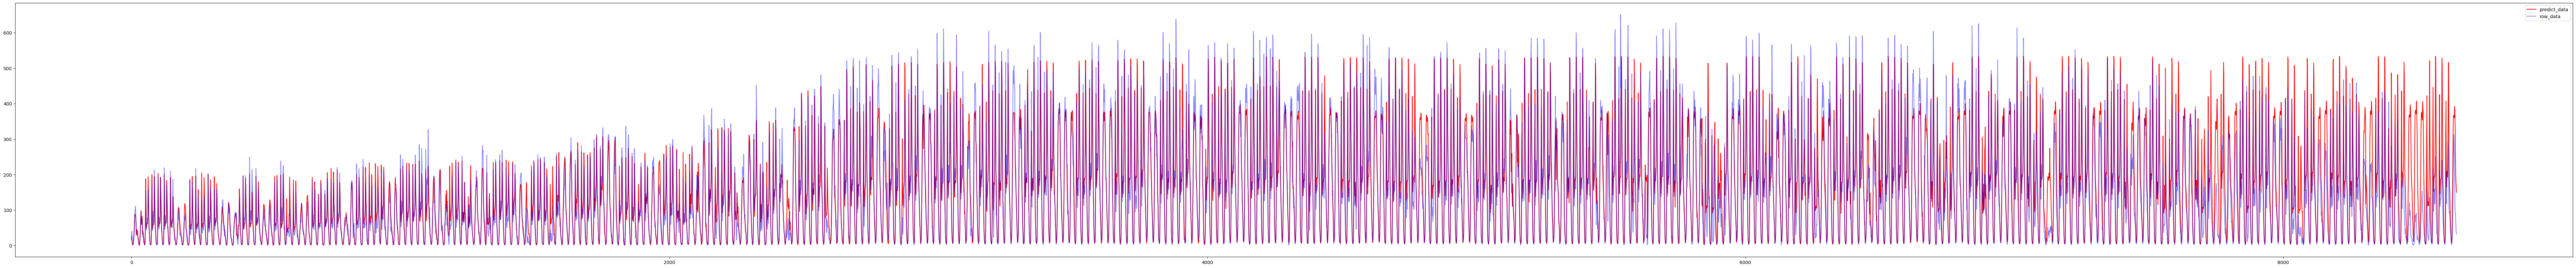

In [ ]:
plt.figure(figsize=(100, 10))
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
# plt.savefig("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/RNN2_try6.png")
plt.show()

In [ ]:
x

array([[16],
       [40],
       [32],
       ...,
       [52],
       [38],
       [31]])

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

29.817907333374023
0.07593366503715515
1.2884448211652855


0
count  8645.000000
mean      1.288445
std       1.102470
min       0.075934
25%       0.892432
50%       1.038987
75%       1.313224
max      29.817907

# RNN try8

In [25]:
maxlen = 12
train_prms = np.empty((id.shape[0], maxlen))
print(train_prms.shape)
train_prms[:, 0] = season #/ 4.0   #季節を0～1に正規化
train_prms[:, 1] = yr
train_prms[:, 2] = mnth #/ 6.0 #月を0～1に正規化
train_prms[:, 3] = hr #/ 11.5 #時間を0～1に正規化
train_prms[:, 4] = holiday
train_prms[:, 5] = weekday #/ 6.0   #曜日を0～1に正規化
train_prms[:, 6] = workingday
train_prms[:, 7] = weathersit #/ 4.0   #天気を0～1に正規化
train_prms[:, 8] = atemp
train_prms[:, 9] = temp
train_prms[:, 10] = hum
train_prms[:, 11] = windspeed
# rnd = np.random.default_rng()
# rnd.shuffle(train_prms,axis=0)
train_trgs = cnt

(8645, 12)


In [26]:
print(f"train_parameter = \n{train_prms}:{train_prms.shape}")
print(f"train_target = {train_trgs}:{train_trgs.shape}")
# print(f"test_parameter = \n{test_prm}:{test_prm.shape}")

train_parameter = 
[[ 1.      0.      1.     ...  0.24    0.81    0.    ]
 [ 1.      0.      1.     ...  0.22    0.8     0.    ]
 [ 1.      0.      1.     ...  0.22    0.8     0.    ]
 ...
 [ 1.      0.     12.     ...  0.4     0.58    0.194 ]
 [ 1.      0.     12.     ...  0.38    0.62    0.1343]
 [ 1.      0.     12.     ...  0.36    0.66    0.    ]]:(8645, 12)
train_target = [[16]
 [40]
 [32]
 ...
 [52]
 [38]
 [31]]:(8645, 1)


In [27]:
y = train_prms.reshape(train_prms.shape[0], train_prms.shape[1], 1)
# train_prm2 = np.delete(train_prm, 0, 1)
# y = train_prm2.reshape(train_prm2.shape[0], train_prm2.shape[1], 1)
x = train_trgs.reshape(train_trgs.shape[0], 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 600  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

In [30]:
x.shape

(8645, 1)

In [31]:
ES = EarlyStopping(mode='auto', patience=20)
model.fit(y, x,
          epochs=300, #100 epochで学習
          validation_split=0.1, #学習データの10%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/300
244/244 [==============================] - 4s 7ms/step - loss: 23289.1094 - accuracy: 0.0127 - val_loss: 11997.7490 - val_accuracy: 0.0104
Epoch 2/300
244/244 [==============================] - 1s 6ms/step - loss: 18576.8848 - accuracy: 0.0129 - val_loss: 12516.2832 - val_accuracy: 0.0104
Epoch 3/300
244/244 [==============================] - 1s 6ms/step - loss: 18444.6445 - accuracy: 0.0129 - val_loss: 12282.0127 - val_accuracy: 0.0104
Epoch 4/300
244/244 [==============================] - 1s 5ms/step - loss: 16781.4824 - accuracy: 0.0129 - val_loss: 12602.7842 - val_accuracy: 0.0104
Epoch 5/300
244/244 [==============================] - 1s 6ms/step - loss: 12349.8398 - accuracy: 0.0129 - val_loss: 8361.0713 - val_accuracy: 0.0104
Epoch 6/300
244/244 [==============================] - 2s 7ms/step - loss: 10180.5488 - accuracy: 0.0129 - val_loss: 9727.5303 - val_accuracy: 0.0104
Epoch 7/300
244/244 [==============================] - 2s 8ms/step - loss: 9827.5010 - accuracy:

In [32]:
predicted = model.predict(y)
model.evaluate(y,x)

271/271 [==============================] - 1s 3ms/step - loss: 1893.0220 - accuracy: 0.0126


[1893.02197265625, 0.012608444318175316]

In [33]:
r2 = 1 -  np.sum((predicted - x)**2) / np.sum((x - np.mean(x))**2)
print(r2)

0.8942433683265512


In [34]:
predicted

array([[ 31.24093 ],
       [ 20.220554],
       [  8.54484 ],
       ...,
       [184.52351 ],
       [161.89043 ],
       [132.857   ]], dtype=float32)

In [ ]:
plt.figure(figsize=(100, 10))
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
# plt.savefig("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/RNN2_try5.png")
plt.show()

In [ ]:
x

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

In [ ]:
# y2 = test_prm.reshape(test_prm.shape[0], test_prm.shape[1], 1)

# predicted2 = model.predict(y)
# display(predicted2)